# Splines

In [1]:
from IPython import get_ipython
if get_ipython():
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections

import latenta as la
la.logger.setLevel("INFO")

## Random walks

In [2]:
cells = la.Dim(pd.Series(range(100), name = "cell").astype(str))
genes = la.Dim(pd.Series(range(4), name = "gene").astype(str))

In [3]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal())

In [4]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([ 0.0000, -0.1927,  0.2327, -1.8931, -2.4378, -1.4981, -1.7537, -2.5735,
         0.0532,  1.9251])
tensor([-16.7990])


In [5]:
knots = la.Dim(range(10), "knot")

In [6]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([genes, knots]))

In [7]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([[ 0.0000,  1.9936,  2.3620,  2.4452,  3.2443,  1.9422,  1.0058,  2.3385,
          3.1106,  2.5269],
        [ 0.0000,  1.8411,  2.5764,  2.0904,  1.5647,  1.3613,  3.0802,  2.7246,
          1.7892,  0.9228],
        [ 0.0000, -0.6702, -0.2596, -0.5708, -2.4317, -2.7461, -1.6604, -1.1466,
         -1.6163, -2.6377],
        [ 0.0000, -0.4691, -0.9695, -2.2429, -1.6001, -1.1874, -1.0548, -3.6165,
         -3.7328, -3.8135]])
tensor([[-13.2910],
        [-12.8660],
        [-11.7619],
        [-12.9080]])


In [8]:
knots = la.Dim(range(10), "knot")

In [9]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([knots, genes]))

In [10]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.7019,  1.0696, -0.8763,  1.1172],
        [ 0.1846,  1.3037, -0.7954,  1.9146],
        [-0.6058,  0.1802, -1.9376,  1.6914],
        [ 0.7703,  0.6962, -2.1559,  3.0832],
        [ 2.2385, -1.1634, -1.8392,  5.4650],
        [ 2.0352,  0.9344, -1.8155,  5.9935],
        [ 0.9384,  1.2036, -1.8388,  5.5891],
        [ 1.8605,  0.8592, -1.4381,  6.1263],
        [ 1.6967,  2.1539, -1.1737,  5.6239]])
tensor([[-1.1653, -1.4910, -1.3029, -1.5430],
        [-1.3119, -0.9463, -0.9222, -1.2369],
        [-1.2313, -1.5501, -1.5713, -0.9439],
        [-1.8658, -1.0521, -0.9428, -1.8875],
        [-1.9967, -2.6480, -0.9691, -3.7554],
        [-0.9396, -3.1192, -0.9192, -1.0586],
        [-1.5205, -0.9552, -0.9192, -1.0007],
        [-1.3441, -0.9782, -0.9992, -1.0632],
        [-0.9324, -1.7570, -0.9539, -1.0451]])
tensor([[-12.3074, -14.4972,  -9.4998, -13.5343]])
tensor([[-12.3074, -14.4972,  -9.4998, -13.5343]])
tensor([[-8.2704, -8.2


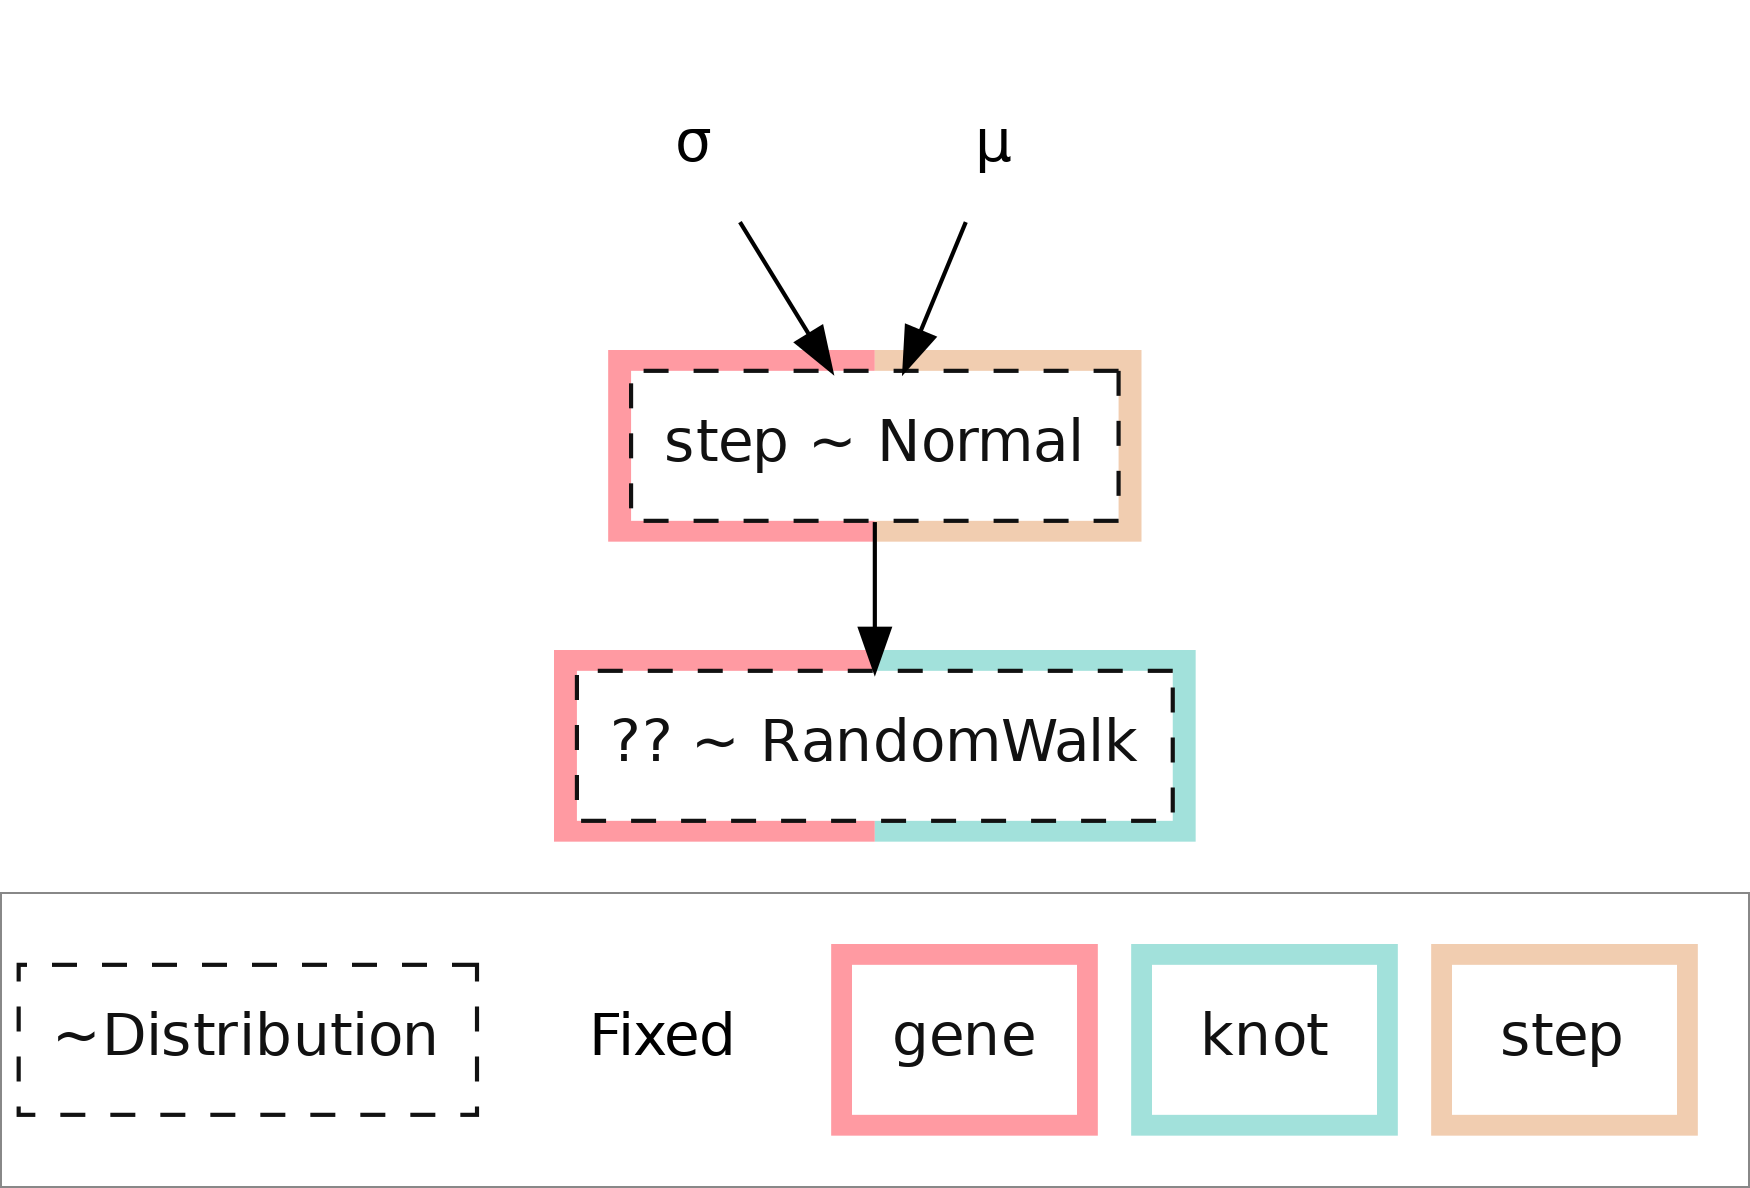

In [11]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(definition = la.Definition([genes])))
dist.plot()

In [12]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000, -1.0724, -1.8944, -0.9940, -0.2677,  0.9974,  0.1325, -1.0628,
         -1.6593, -2.2160],
        [ 0.0000,  0.9536,  2.3739,  1.3465, -0.0575,  0.0711, -1.1086, -2.2980,
         -1.7555, -0.0590],
        [ 0.0000,  0.2345,  1.0540, -0.0488,  1.2035,  1.7699,  1.2079,  1.9898,
          2.3103,  3.1568],
        [ 0.0000, -0.2205, -0.7335, -1.7820, -1.2129, -0.6689, -2.5305, -3.2750,
         -3.5912, -1.7676]])
tensor([[-1.4939, -1.2568, -1.3243, -1.1827, -1.7193, -1.2930, -1.6332, -1.0969,
         -1.0739],
        [-1.3736, -1.9276, -1.4467, -1.9046, -0.9272, -1.6149, -1.6262, -1.0661,
         -2.3578],
        [-0.9464, -1.2547, -1.5270, -1.7031, -1.0793, -1.0769, -1.2246, -0.9703,
         -1.2772],
        [-0.9432, -1.0505, -1.4686, -1.0809, -1.0669, -2.6517, -1.1961, -0.9689,
         -2.5817]])
tensor([[-12.0740],
        [-14.2447],
        [-11.0595],
        [-13.0087]])
tensor([[-12.0740],
        [-14.2447],
        [-11.0595],
        [-13.0087]])


In [13]:
genes = la.Dim(pd.Series(range(100), name = "gene").astype(str))

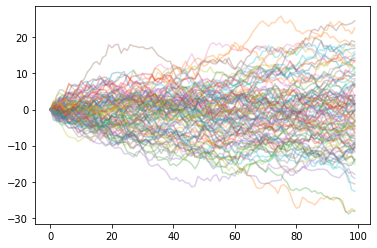

In [14]:
dist = la.distributions.RandomWalk(100, la.distributions.Normal(definition = la.Definition([genes])))
dist.run()
value = dist.value.cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x = np.arange(value.shape[1]), y = value[i], alpha = 0.3)

## Generative model

In [15]:
n_cells = 50
cell_ids = [str(i) for i in range(n_cells)]
cells = la.Dim(pd.Series(cell_ids, name = "cell"))

x = la.Fixed(pd.Series(np.random.uniform(0, 20, n_cells), index = cells.index), label = "x")

In [16]:
n_genes = 100
n_knots = 10
genes = la.Dim([str(i) for i in range(n_genes)], id = "gene")
knots = la.Dim(range(n_knots), id = "knot")

steps = np.random.choice([-1, 1], (n_genes, n_knots)) * np.random.normal(3., 1., (n_genes, n_knots)) * (np.random.random((n_genes, n_knots)) > 0.5)
a_value = steps.cumsum(1)
a_value = a_value - a_value.mean(1, keepdims = True)
a = la.Fixed(
    pd.DataFrame(
        a_value,
        columns = knots.index, index = genes.index),
    label = "a"
)
intercept = la.Fixed(pd.Series(np.random.choice([-1, 1], n_genes) * np.random.normal(3., 1., n_genes) * (np.random.random(n_genes) > 0.5), index = genes.index), label = "intercept")
scale = la.Fixed(pd.Series(np.random.uniform(1., 1.2, n_genes), index = genes.index), label = "scale")

In [17]:
y = la.links.scalar.Spline(x = x, a = a, b = intercept)
dist = la.distributions.Normal(loc = y, scale = scale)


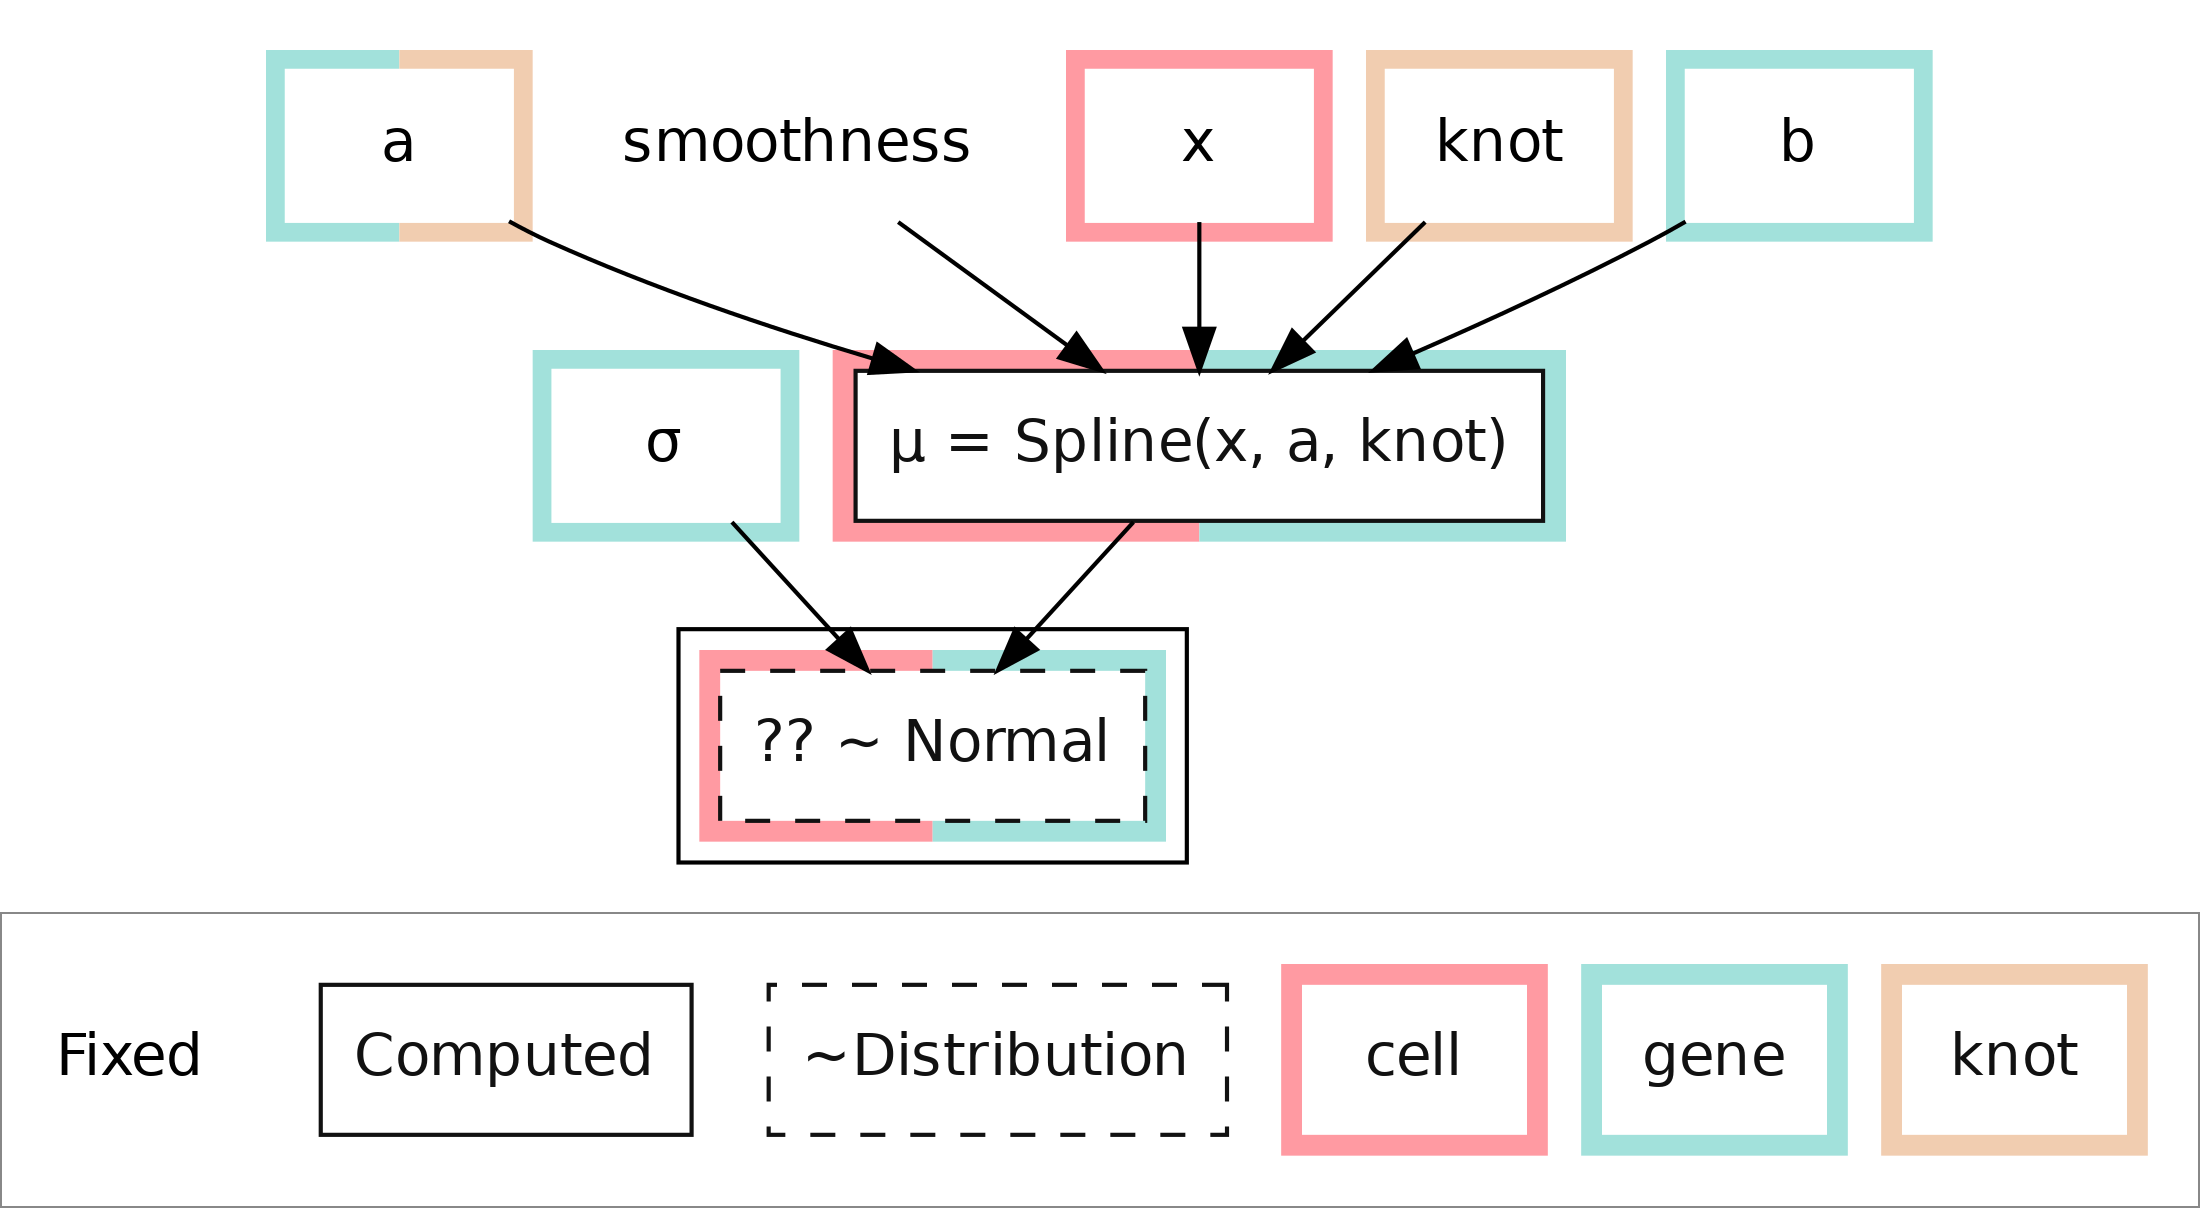

In [18]:
model_gs = la.Model(dist, label = "ground truth", symbol = "gs")
model_gs.plot()

In [19]:
posterior = la.posterior.Posterior(dist)
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

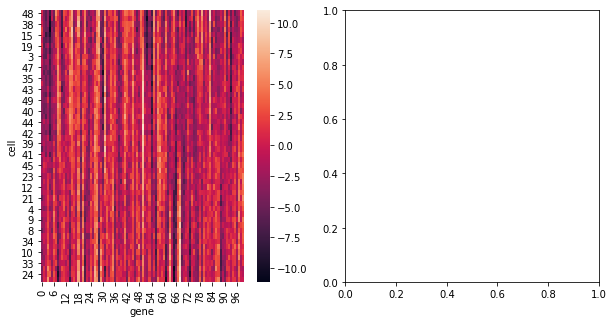

In [20]:
loc_value = posterior.samples[dist.loc].sel(sample = 0).to_pandas()
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)

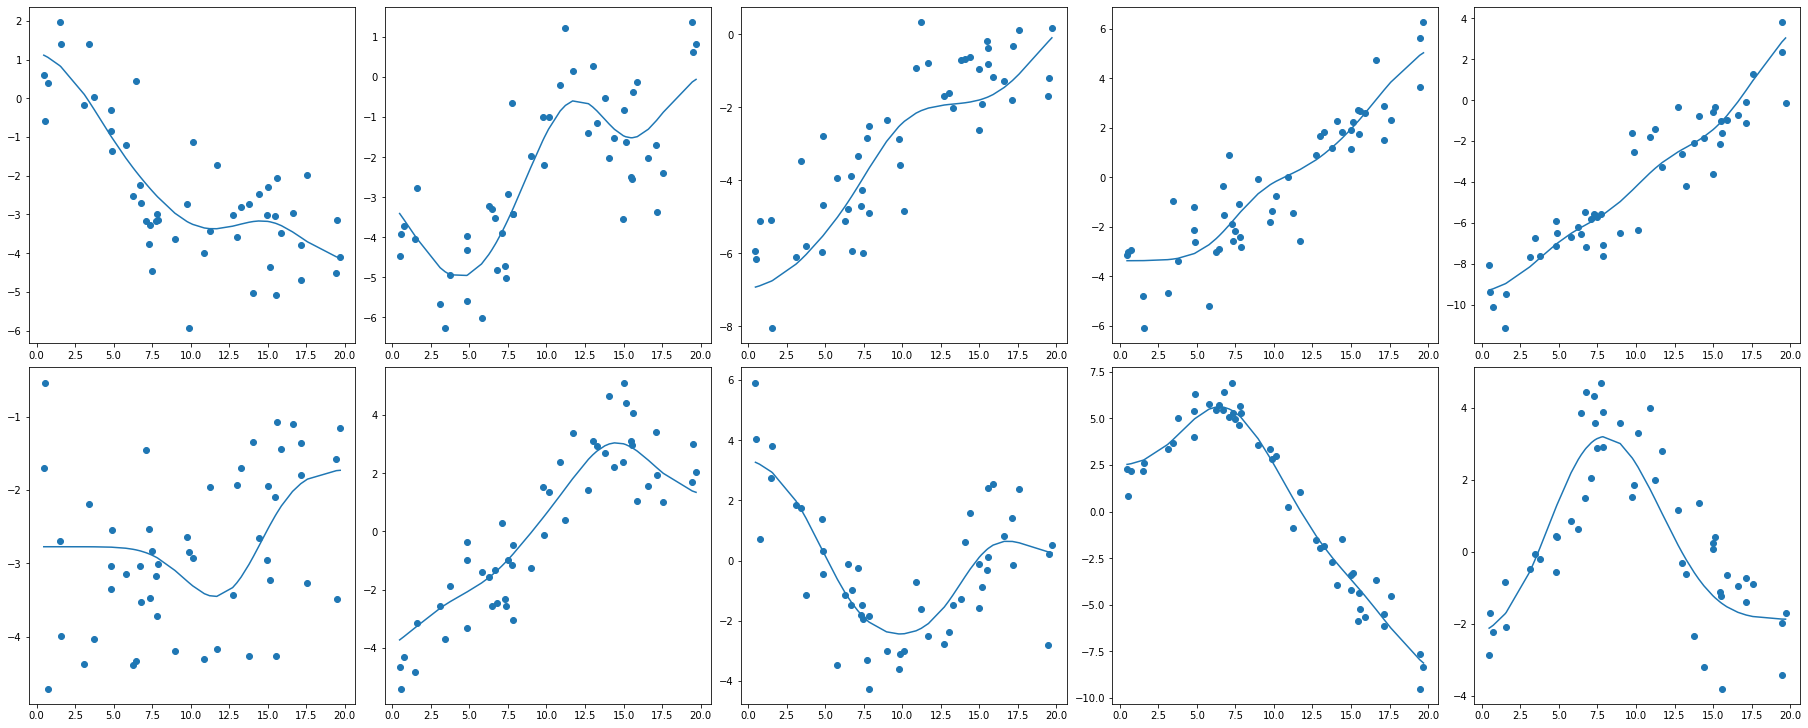

In [21]:
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
gene_ids = genes.coords[:10]
fig, axes = la.plotting.axes_wrap(len(gene_ids))
cell_order = model_gs.find("x").prior_pd().sort_values().index
x_value = model_gs.find("x").prior_pd()

for gene_id, ax in zip(gene_ids, axes):
    ax.scatter(
        x_value.loc[cell_order],
        observation_value.loc[cell_order, gene_id]
    )
    ax.plot(
        x_value.loc[cell_order],
        loc_value.loc[cell_order, gene_id]
    )
# sns.heatmap(observation_value.loc[cell_order], ax = ax0)

## Regression with variational inference

In [22]:
s = la.Parameter(1., definition = scale, transforms = la.distributions.Exponential().biject_to())

z = la.links.scalar.Spline(x, b = intercept, knot = model_gs.find("knot"), output = y.value_definition)

dist = la.distributions.Normal(loc = z, scale = s)

observation = la.Observation(observation_value, dist, label = "observation")


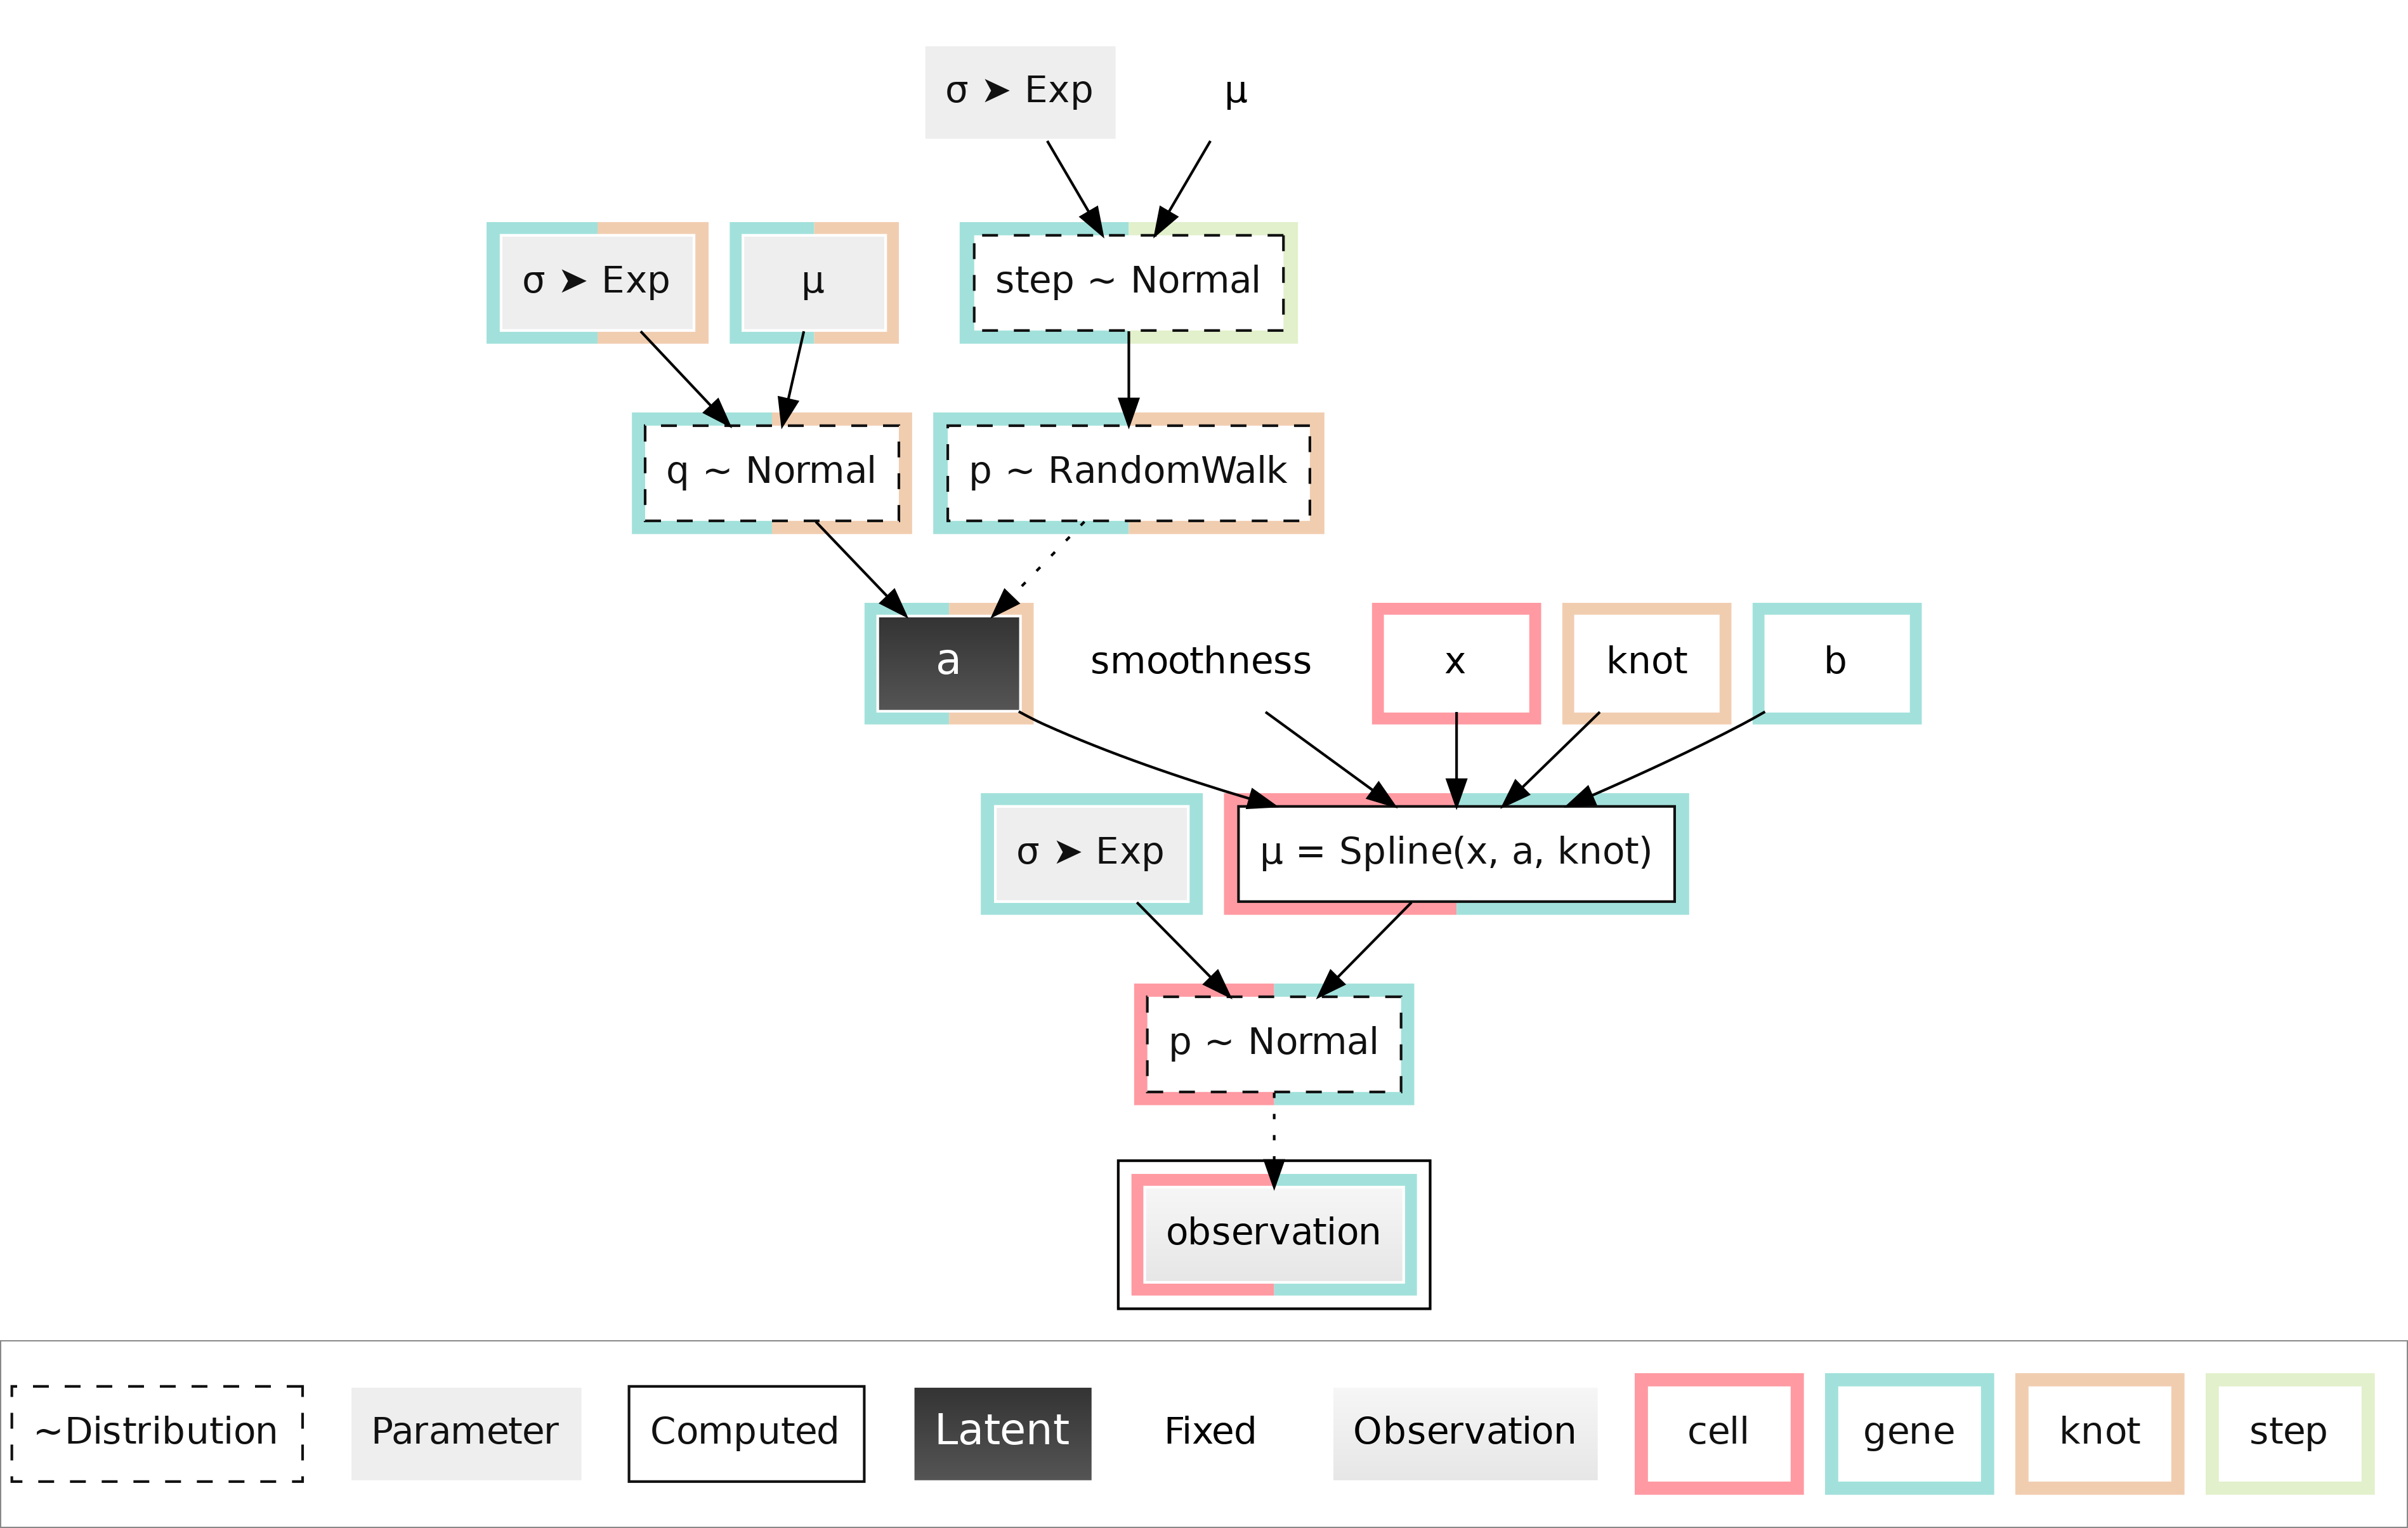

In [23]:
model = la.Model(observation)
model.plot()

  0%|                                                                                                         …

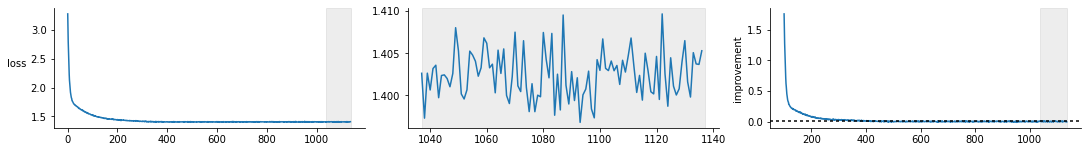

In [24]:
inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
trainer = la.infer.trainer.Trainer(inference)
trace = trainer.train(3000)
trace.plot();
# inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
# trainer = la.infer.trainer.Trainer(inference)
# trace = trainer.train(3000)
# trace.plot();

In [25]:
observed = la.posterior.Posterior(observation)
observed.sample(10, subsample_n = 1)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

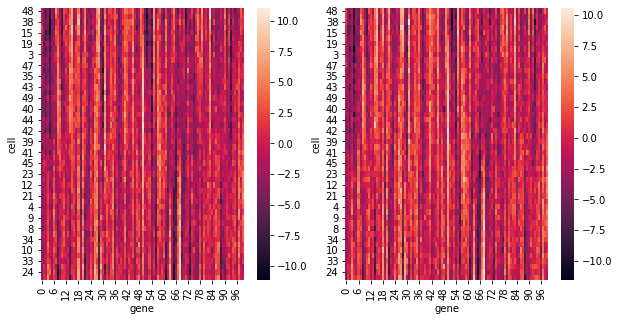

In [26]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)
modelled_value = observed.samples[observation.p].sel(sample = 0).to_pandas()
sns.heatmap(modelled_value.loc[cell_order], ax = ax1)

In [27]:
x_causal = la.posterior.scalar.ScalarVectorCausal(x, observation)
x_causal.sample(10)

  0%|          | 0/10 [00:00<?, ?it/s]

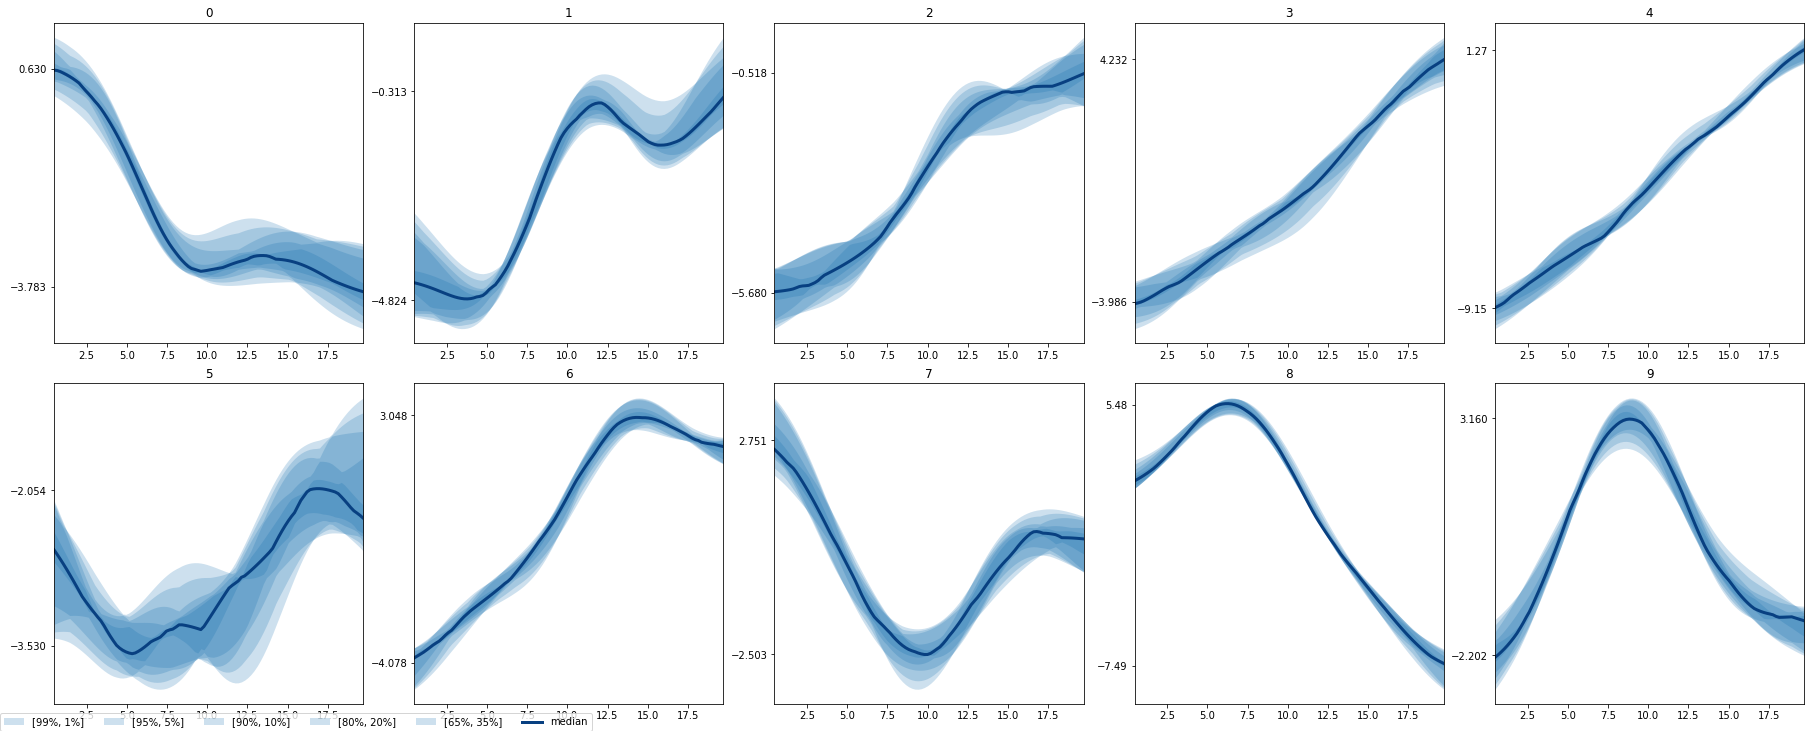

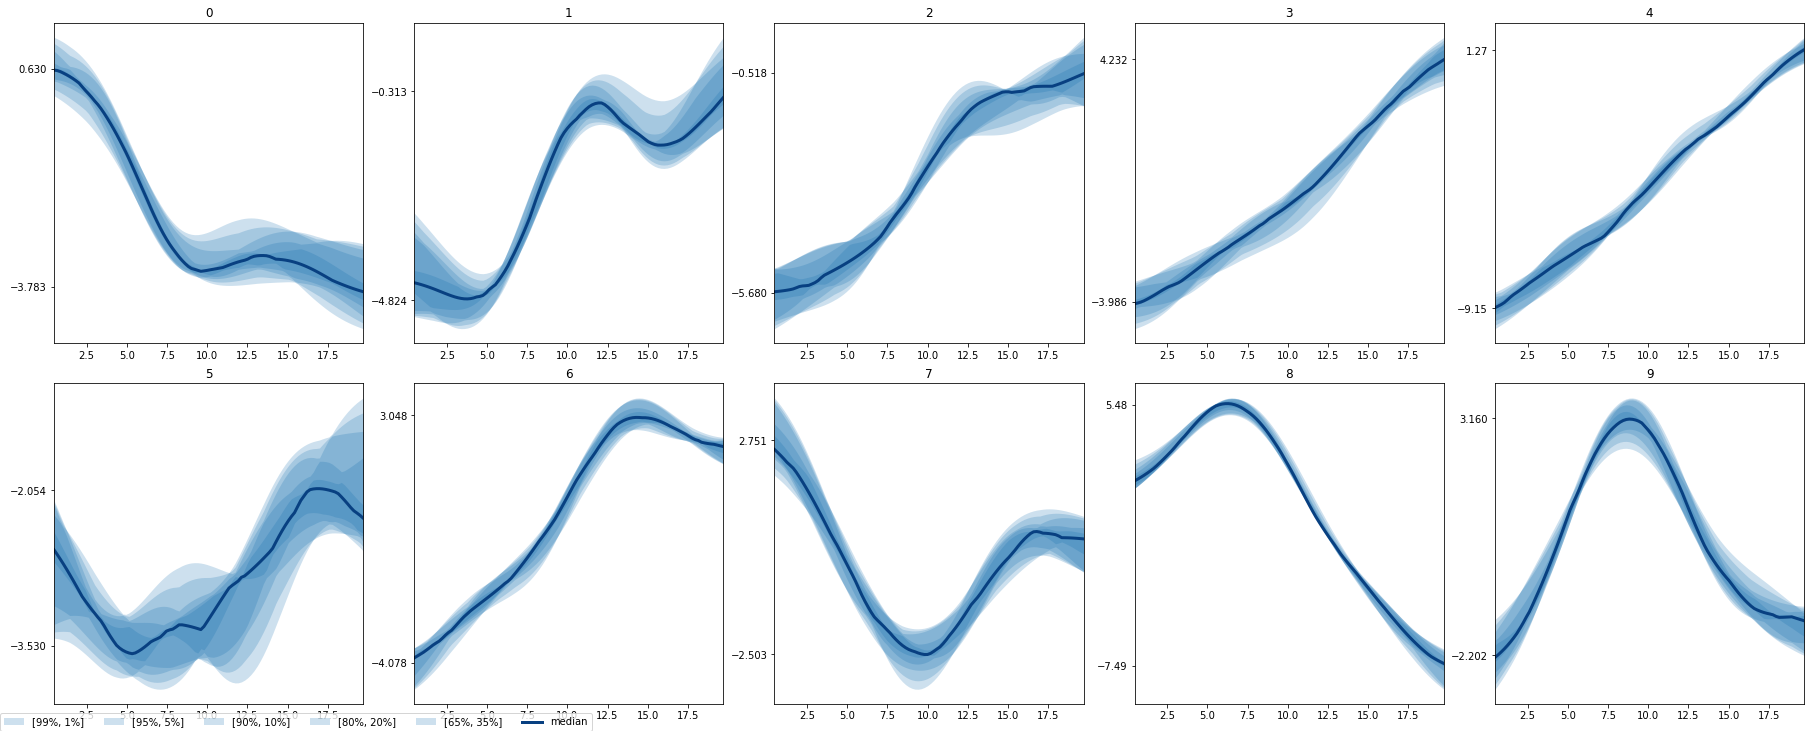

In [30]:
x_causal.plot_features()

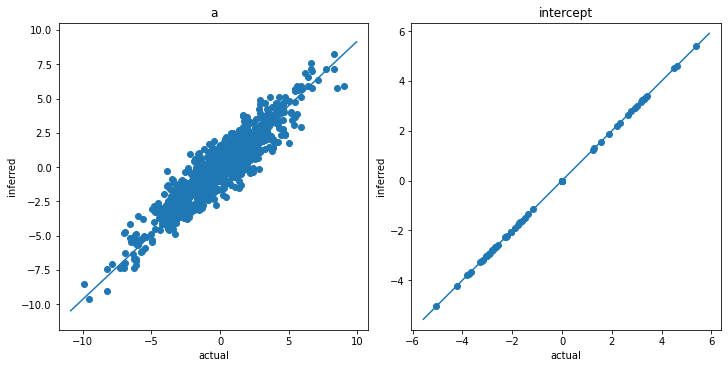

In [29]:
parameter_values = la.qa.cookbooks.check_parameters(la.qa.cookbooks.gather_parameters(["a", "intercept"], model_gs, observed))

In [138]:
dim = la.Dim([1, 2, 3, 4], "h")

In [139]:
x_value = pd.Series(
    [1., 2., 3., 0.],
    index = dim.index,
    name = "x"
)
x = la.Fixed(x_value)

y = la.links.scalar.Spline(x)

assert y.value_definition[0] == x[0]
assert y.ndim == 1